In [2]:

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import cv2
from PIL import Image
import shutil
import os

for dirname, _, filenames in os.walk('C:/Users/elika/Senior Design'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/elika/Senior Design\test1.ipynb
C:/Users/elika/Senior Design\ChemTreat Image Analysis\Beginning_Image_Processing.ipynb
C:/Users/elika/Senior Design\ChemTreat Image Analysis\Camera
C:/Users/elika/Senior Design\ChemTreat Image Analysis\CNN_test - Copy.ipynb
C:/Users/elika/Senior Design\ChemTreat Image Analysis\CNN_test.ipynb
C:/Users/elika/Senior Design\ChemTreat Image Analysis\CNN_test.py
C:/Users/elika/Senior Design\ChemTreat Image Analysis\Initial Testing.ipynb
C:/Users/elika/Senior Design\ChemTreat Image Analysis\README.md
C:/Users/elika/Senior Design\ChemTreat Image Analysis\Video_Saving.ipynb
C:/Users/elika/Senior Design\ChemTreat Image Analysis\.git\COMMIT_EDITMSG
C:/Users/elika/Senior Design\ChemTreat Image Analysis\.git\config
C:/Users/elika/Senior Design\ChemTreat Image Analysis\.git\description
C:/Users/elika/Senior Design\ChemTreat Image Analysis\.git\FETCH_HEAD
C:/Users/elika/Senior Design\ChemTreat Image Analysis\.git\HEAD
C:/Users/elika/Senior Design\ChemTreat Ima

In [4]:
class_names =  ['Positive', 'Negative']
data = "C:/Users/elika/Senior Design/Data/Concrete/"

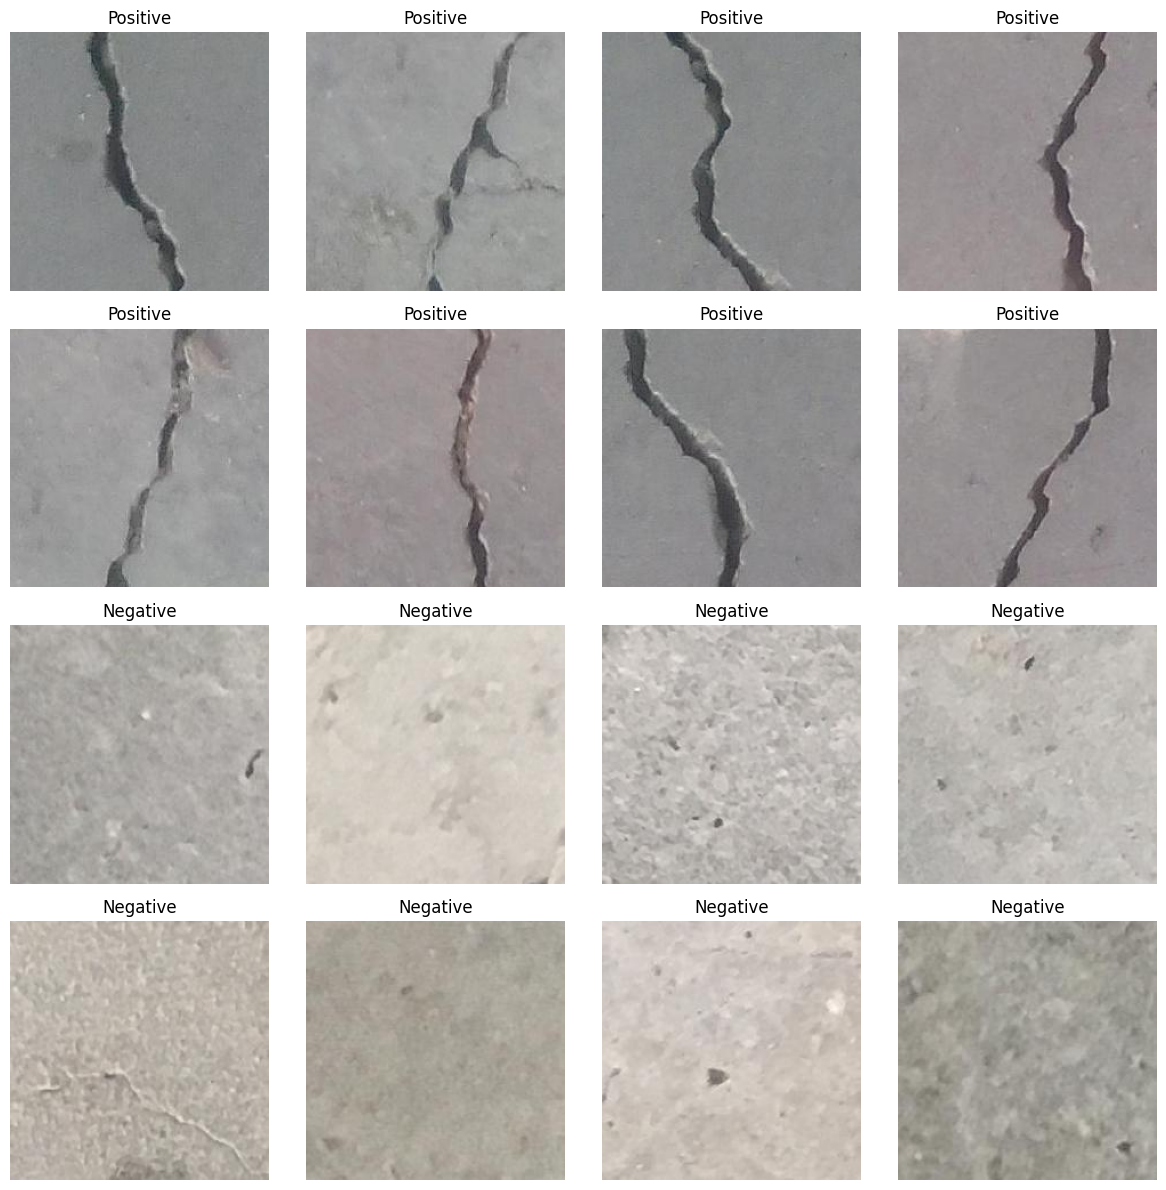

In [5]:
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

positive_images = [os.path.join(data, 'Positive', img) for img in os.listdir(os.path.join(data, 'Positive'))[:8]]
negative_images = [os.path.join(data, 'Negative', img) for img in os.listdir(os.path.join(data, 'Negative'))[:8]]

for i in range(8):
    img = cv2.imread(positive_images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title('Positive')
    axes[i].axis('off')

for i in range(8, 16):
    img = cv2.imread(negative_images[i-8])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title('Negative')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

#split train and test data from data directory

# Load images and labels
images = positive_images + negative_images
labels = [0] * len(positive_images) + [1] * len(negative_images)  # 0 for Positive, 1 for Negative

# Read and preprocess images
def read_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))  # Resize to match the input shape of the model
    return img

images = [read_and_preprocess_image(img_path) for img_path in images]
images = np.array(images)
labels = np.array(labels)

# Split the data into train and test sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [21]:
print(labels)

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\elika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 921ms/step - accuracy: 0.4167 - loss: 4.0562 - val_accuracy: 0.2500 - val_loss: 44.7699
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5833 - loss: 24.3120 - val_accuracy: 0.2500 - val_loss: 39.5356
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5833 - loss: 21.5455 - val_accuracy: 0.2500 - val_loss: 24.9689
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5833 - loss: 13.6678 - val_accuracy: 0.2500 - val_loss: 9.5698
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5833 - loss: 5.1692 - val_accuracy: 0.0000e+00 - val_loss: 4.3874
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.0000e+00 - loss: 6.6952 - val_accuracy: 0.7500 - val_loss: 1.4860
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4167 - loss: 2.7090 - val_accuracy: 0.2500 - val_loss: 4.2268
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5833 - loss: 2.0176 - val_accuracy: 0.2

1/1 - 0s - 31ms/step - accuracy: 1.0000 - loss: 0.0042


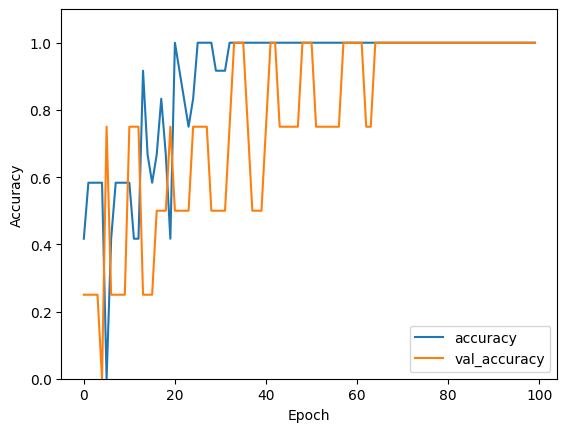

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
print(test_acc)

1.0


In [22]:
#show prediction

model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


array([[ 10.502709 ,   2.5806801,  -7.8597784,  -6.4993987,  -6.5915074,
         -7.332998 ,  -1.7887957,  -5.214695 ,  -8.638222 ,  -8.561715 ],
       [  9.777648 ,   0.7849727,  -6.8844533,  -7.184437 ,  -7.4007936,
         -5.2261744,  -1.3996248,  -8.988316 ,  -9.8265915, -13.540417 ],
       [  8.269101 ,   4.138063 ,  -7.7310576,  -6.349361 ,  -6.036528 ,
         -3.4184775,  -1.6602929,  -9.617852 ,  -7.225447 , -14.254658 ],
       [  7.532962 ,  15.53501  , -18.030092 ,  -6.2387414,  -7.661409 ,
         -0.7953544,  -2.093102 , -15.555608 , -11.71164  , -13.951668 ]],
      dtype=float32)